In [1]:
import pandas as pd
import matplotlib.pyplot as plt #visualization tool
from matplotlib import style
import seaborn as sns
style.use('ggplot') 
%matplotlib inline

import plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf 
import plotly.offline as pyo 
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [2]:
df=pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
df

id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193465  1237181       1    13     1      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke             1           0           1             0   
2                Z Khan             0           0           0             0   
3                Z Khan             1           0           1             0   
4                Z Khan             1           0           1             0   
...                 ...           ...         ...         ...           ...   
193463  NM Coulter-Nile             0           0           0             0   
193464  NM Coulter-Nile             1           0           1             0   
193465        KH Pandya             0           1           1             0   
193466        KH Pandya             1           0           1             0   
193467        KH Pandya             1           0           1             0   

        is_wicket dismissal_kind player_dismissed fielder extras_type  \
0               0            NaN              NaN     NaN         NaN   
1               0            NaN              NaN     NaN         NaN   
2               0            NaN              NaN     NaN         NaN   
3               0            NaN              NaN     NaN         NaN   
4               0            NaN              NaN     NaN         NaN   
...           ...            ...              ...     ...         ...   
193463          0            NaN              NaN     NaN         NaN   
193464          0            NaN              NaN     NaN         NaN   
193465          0            NaN              NaN     NaN       wides   
193466          0            NaN              NaN     NaN         NaN   
193467          0            NaN              NaN     NaN         NaN   

                 batting_team                 bowling_team  
0       Kolkata Knight Riders  Royal Challengers Bangalore  
1       Kolkata Knight Riders  Royal Challengers Bangalore  
2       Kolkata Knight Riders  Royal Challengers Bangalore  
3       Kolkata Knight Riders  Royal Challengers Bangalore  
4       Kolkata Knight Riders  Royal Challengers Bangalore  
...                       ...                          ...  
193463         Delhi Capitals               Mumbai Indians  
193464         Delhi Capitals               Mumbai Indians  
193465         Delhi Capitals               Mumbai Indians  
193466         Delhi Capitals               Mumbai Indians  
193467         Delhi Capitals               Mumbai Indians  

[193468 rows x 18 columns]

In [3]:
df.head()

id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  non_boundary  is_wicket  \
0             1           0           1             0          0   
1             1           0           1             0          0   
2             0           0           0             0          0   
3             1           0           1             0          0   
4             1           0           1             0          0   

  dismissal_kind player_dismissed fielder extras_type           batting_team  \
0            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
1            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
2            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
3            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
4            NaN              NaN     NaN         NaN  Kolkata Knight Riders   

                  bowling_team  
0  Royal Challengers Bangalore  
1  Royal Challengers Bangalore  
2  Royal Challengers Bangalore  
3  Royal Challengers Bangalore  
4  Royal Challengers Bangalore

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [5]:
df.describe()

id         inning           over           ball  \
count  1.934680e+05  193468.000000  193468.000000  193468.000000   
mean   7.567688e+05       1.482131       9.177027       3.615967   
std    3.060971e+05       0.499682       5.676848       1.807128   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.012270e+05       1.000000       4.000000       2.000000   
50%    7.292970e+05       1.000000       9.000000       4.000000   
75%    1.082628e+06       2.000000      14.000000       5.000000   
max    1.237181e+06       2.000000      19.000000       9.000000   

        batsman_runs     extra_runs     total_runs   non_boundary  \
count  193468.000000  193468.000000  193468.000000  193468.000000   
mean        1.240231       0.066414       1.306645       0.000083   
std         1.610867       0.339991       1.598802       0.009094   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         1.000000       0.000000       1.000000       0.000000   
max         6.000000       7.000000       7.000000       1.000000   

           is_wicket  
count  193468.000000  
mean        0.049078  
std         0.216031  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [6]:
df.isnull().sum().sort_values(ascending = False)/len(df) * 100

fielder             96.493477
player_dismissed    95.092212
dismissal_kind      95.092212
extras_type         94.710753
bowling_team         0.098724
inning               0.000000
batting_team         0.000000
is_wicket            0.000000
non_boundary         0.000000
id                   0.000000
extra_runs           0.000000
batsman_runs         0.000000
bowler               0.000000
non_striker          0.000000
batsman              0.000000
ball                 0.000000
over                 0.000000
total_runs           0.000000
dtype: float64

In [7]:
df["ball"]

0         5
1         6
2         1
3         2
4         3
         ..
193463    5
193464    6
193465    1
193466    2
193467    3
Name: ball, Length: 193468, dtype: int64

In [8]:
df['inning']

0         1
1         1
2         1
3         1
4         1
         ..
193463    1
193464    1
193465    1
193466    1
193467    1
Name: inning, Length: 193468, dtype: int64

In [9]:
df.drop(['dismissal_kind','player_dismissed','fielder','extras_type'],axis=1,inplace=True)

In [10]:
df

id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193465  1237181       1    13     1      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke             1           0           1             0   
2                Z Khan             0           0           0             0   
3                Z Khan             1           0           1             0   
4                Z Khan             1           0           1             0   
...                 ...           ...         ...         ...           ...   
193463  NM Coulter-Nile             0           0           0             0   
193464  NM Coulter-Nile             1           0           1             0   
193465        KH Pandya             0           1           1             0   
193466        KH Pandya             1           0           1             0   
193467        KH Pandya             1           0           1             0   

        is_wicket           batting_team                 bowling_team  
0               0  Kolkata Knight Riders  Royal Challengers Bangalore  
1               0  Kolkata Knight Riders  Royal Challengers Bangalore  
2               0  Kolkata Knight Riders  Royal Challengers Bangalore  
3               0  Kolkata Knight Riders  Royal Challengers Bangalore  
4               0  Kolkata Knight Riders  Royal Challengers Bangalore  
...           ...                    ...                          ...  
193463          0         Delhi Capitals               Mumbai Indians  
193464          0         Delhi Capitals               Mumbai Indians  
193465          0         Delhi Capitals               Mumbai Indians  
193466          0         Delhi Capitals               Mumbai Indians  
193467          0         Delhi Capitals               Mumbai Indians  

[193468 rows x 14 columns]

In [11]:
df.groupby('batsman')['total_runs'].sum().sort_values(ascending=False).to_frame().head(20)

total_runs
batsman                   
V Kohli               6081
SK Raina              5604
DA Warner             5522
S Dhawan              5452
RG Sharma             5394
CH Gayle              5103
AB de Villiers        5016
RV Uthappa            4878
MS Dhoni              4855
G Gambhir             4479
AM Rahane             4104
SR Watson             4036
KD Karthik            3996
AT Rayudu             3798
MK Pandey             3418
YK Pathan             3367
KA Pollard            3188
BB McCullum           3099
PA Patel              3041
V Sehwag              2915

In [12]:
a=df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False).to_frame()
a

total_runs
batting_team                           
Mumbai Indians                    32286
Royal Challengers Bangalore       30214
Kings XI Punjab                   30017
Kolkata Knight Riders             29383
Chennai Super Kings               28363
Rajasthan Royals                  24507
Delhi Daredevils                  24285
Sunrisers Hyderabad               19332
Deccan Chargers                   11463
Pune Warriors                      6358
Delhi Capitals                     5296
Gujarat Lions                      4856
Rising Pune Supergiant             2470
Rising Pune Supergiants            2063
Kochi Tuskers Kerala               1901

In [13]:
df.groupby('bowling_team')['is_wicket'].sum().sort_values(ascending=False).to_frame()

is_wicket
bowling_team                          
Mumbai Indians                    1237
Royal Challengers Bangalore       1115
Chennai Super Kings               1104
Kolkata Knight Riders             1079
Kings XI Punjab                   1070
Delhi Daredevils                   912
Rajasthan Royals                   910
Sunrisers Hyderabad                753
Deccan Chargers                    446
Pune Warriors                      235
Delhi Capitals                     212
Gujarat Lions                      149
Rising Pune Supergiant             113
Rising Pune Supergiants             76
Kochi Tuskers Kerala                74

In [14]:
df.groupby('batting_team')['extra_runs'].sum().sort_values(ascending=False).to_frame()

extra_runs
batting_team                           
Mumbai Indians                     1739
Kolkata Knight Riders              1617
Kings XI Punjab                    1521
Royal Challengers Bangalore        1473
Chennai Super Kings                1410
Delhi Daredevils                   1274
Rajasthan Royals                   1181
Sunrisers Hyderabad                 943
Deccan Chargers                     578
Pune Warriors                       318
Gujarat Lions                       229
Delhi Capitals                      222
Kochi Tuskers Kerala                143
Rising Pune Supergiants             101
Rising Pune Supergiant              100

In [15]:
df.groupby('batsman')['extra_runs'].sum().sort_values(ascending=False).to_frame()

extra_runs
batsman                      
CH Gayle                  331
RV Uthappa                271
DA Warner                 268
G Gambhir                 262
S Dhawan                  255
...                       ...
SE Bond                     0
SD Lad                      0
CR Woakes                   0
CRD Fernando                0
M Prasidh Krishna           0

[537 rows x 1 columns]

In [16]:
df['ball'].sum()

699574

In [17]:
df['extra_runs'].sum()

12849

In [18]:
df.groupby('batting_team')['extra_runs'].sum().sort_values()

batting_team
Rising Pune Supergiant          100
Rising Pune Supergiants         101
Kochi Tuskers Kerala            143
Delhi Capitals                  222
Gujarat Lions                   229
Pune Warriors                   318
Deccan Chargers                 578
Sunrisers Hyderabad             943
Rajasthan Royals               1181
Delhi Daredevils               1274
Chennai Super Kings            1410
Royal Challengers Bangalore    1473
Kings XI Punjab                1521
Kolkata Knight Riders          1617
Mumbai Indians                 1739
Name: extra_runs, dtype: int64

In [19]:
bat=df.groupby('batting_team')['batsman_runs'].sum().sort_values()
bat

batting_team
Kochi Tuskers Kerala            1758
Rising Pune Supergiants         1962
Rising Pune Supergiant          2370
Gujarat Lions                   4627
Delhi Capitals                  5074
Pune Warriors                   6040
Deccan Chargers                10885
Sunrisers Hyderabad            18389
Delhi Daredevils               23011
Rajasthan Royals               23326
Chennai Super Kings            26953
Kolkata Knight Riders          27766
Kings XI Punjab                28496
Royal Challengers Bangalore    28741
Mumbai Indians                 30547
Name: batsman_runs, dtype: int64

<BarContainer object of 15 artists>

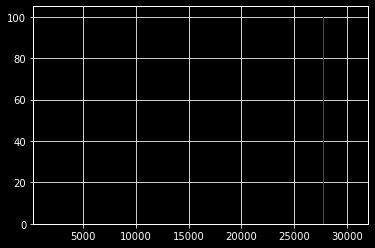

In [20]:
plt.style.use('dark_background')
plt.bar(bat,100,color='r')

In [21]:
px.bar(df.head(200),x="ball",y="bowler",color="is_wicket",height=500,
       hover_data=["ball","bowler"])

In [22]:
px.bar(df.head(200),x="batsman_runs",y="batsman",color="ball",height=500,
       hover_data=["batsman_runs","batsman",'batting_team'])

In [23]:
px.bar(df.head(100), x="ball", y="total_runs", color="bowler", height=400)

In [24]:
sns.set(style = 'darkgrid', rc = {'figure.figsize':(10, 6)}, font_scale = 1.5)

C:\Users\jayar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='ball', ylabel='Density'>

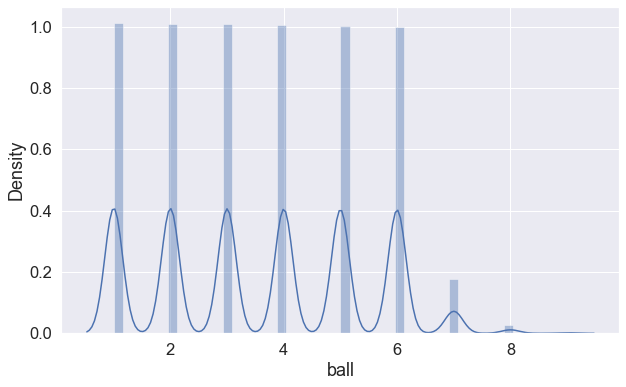

In [25]:
sns.distplot(df['ball'])

C:\Users\jayar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='extra_runs', ylabel='Density'>

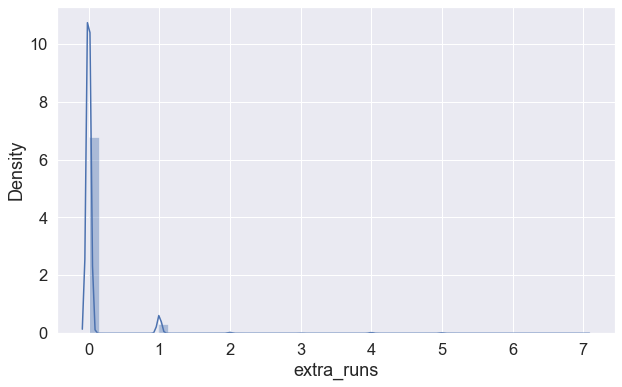

In [26]:
sns.distplot(df['extra_runs'])

C:\Users\jayar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='over', ylabel='Density'>

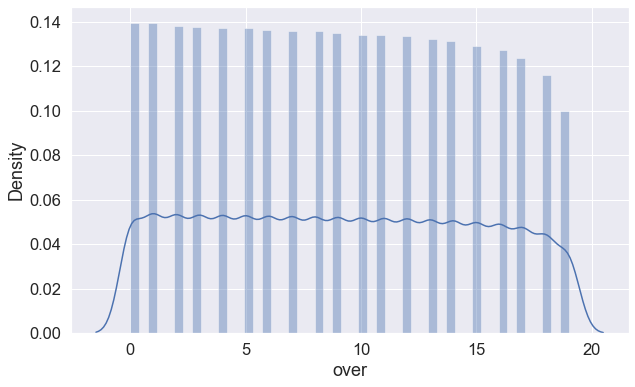

In [27]:
sns.distplot(df['over'])

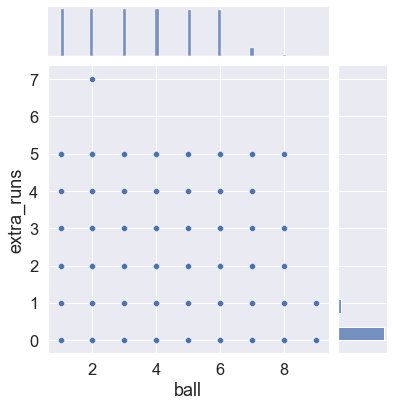

In [28]:
sns.jointplot(x = 'ball', y = 'extra_runs', data = df)

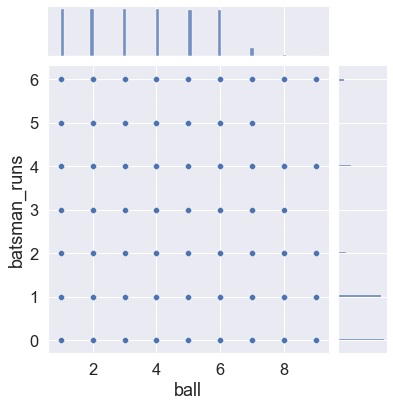

In [29]:
sns.jointplot(x = 'ball', y = 'batsman_runs', data = df)

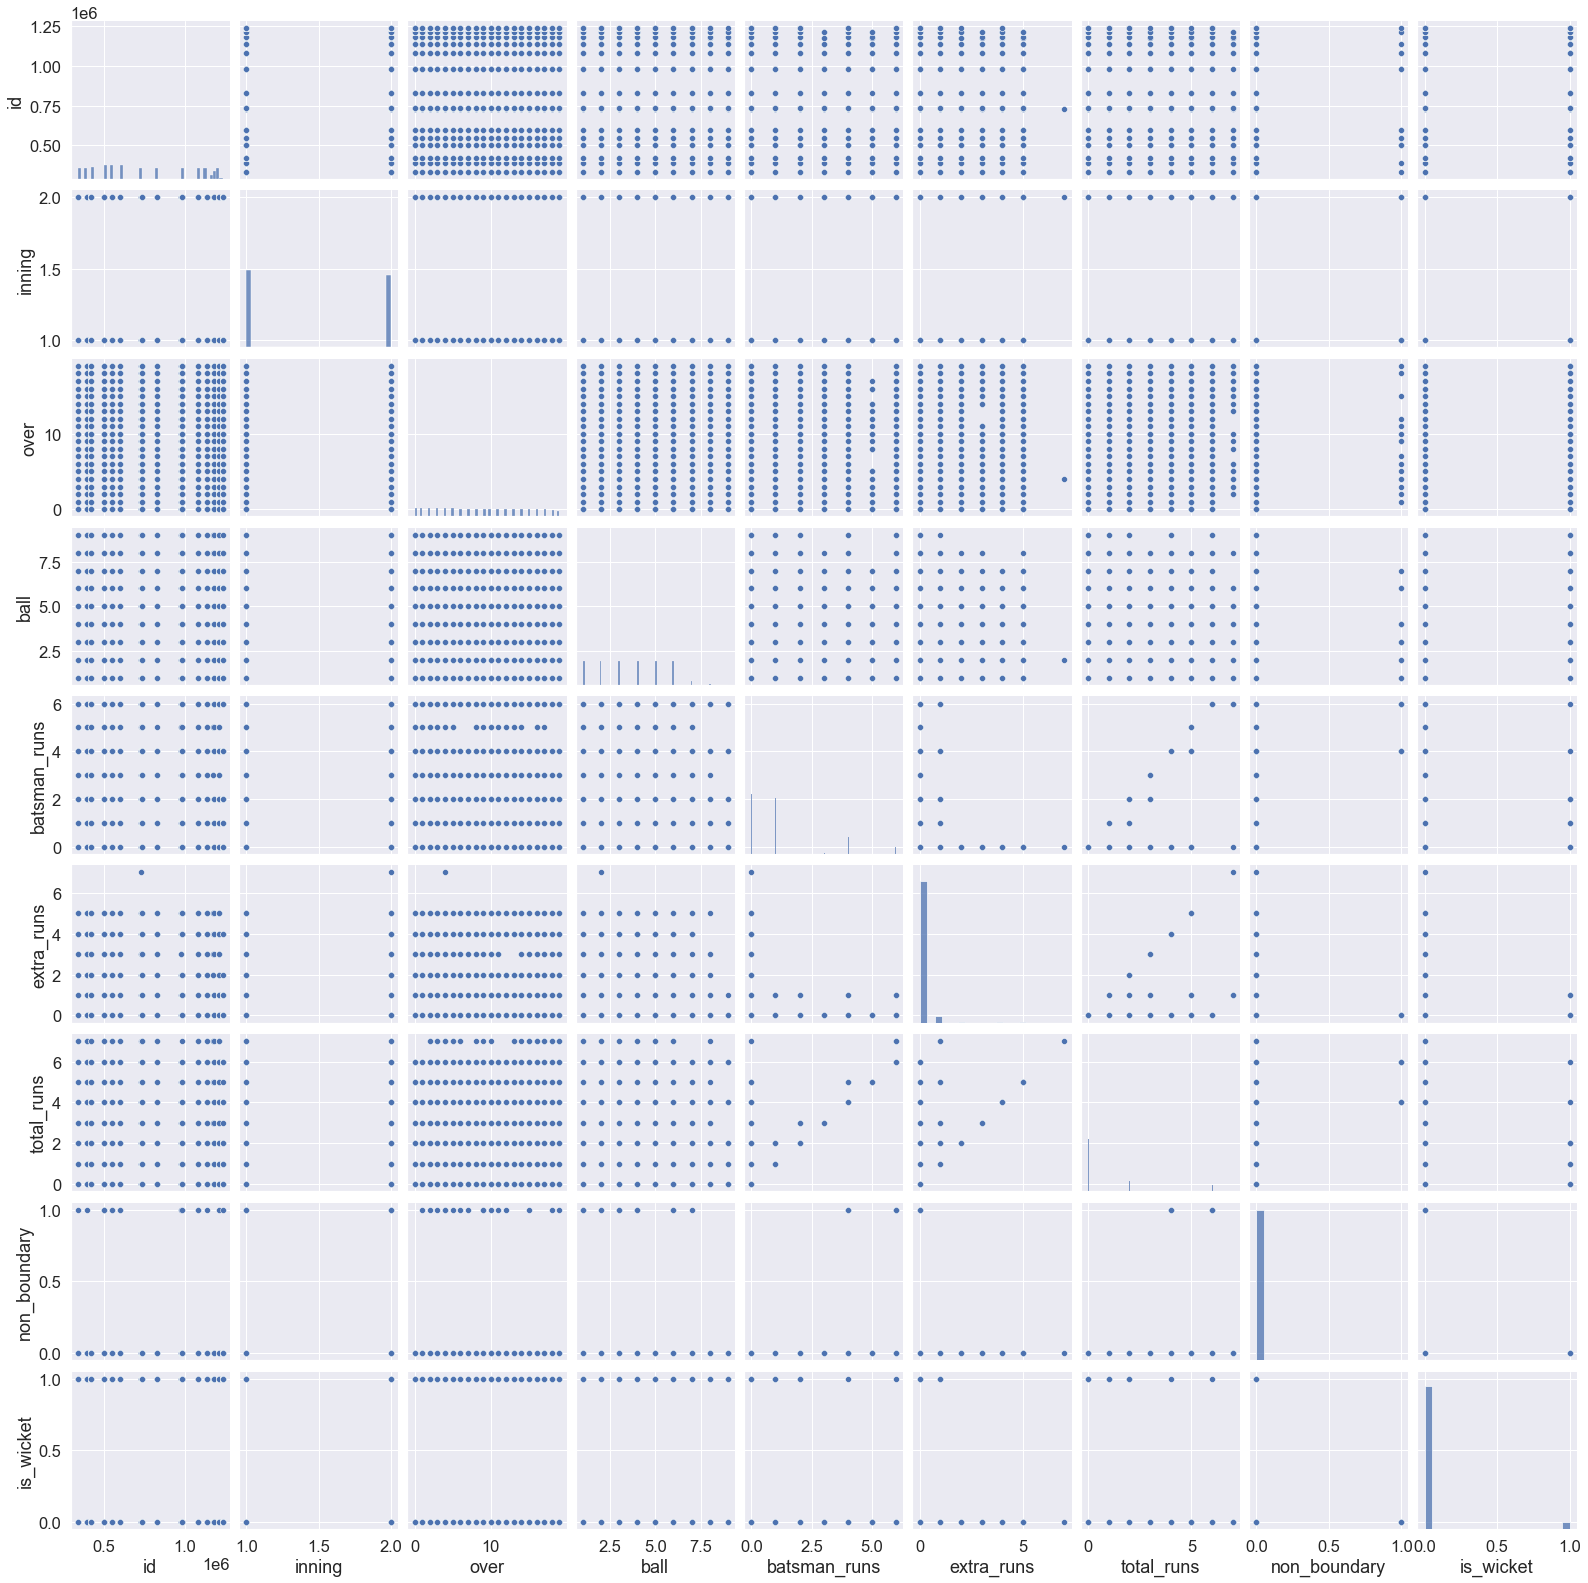

In [30]:
sns.pairplot(df)

<AxesSubplot:xlabel='inning', ylabel='count'>

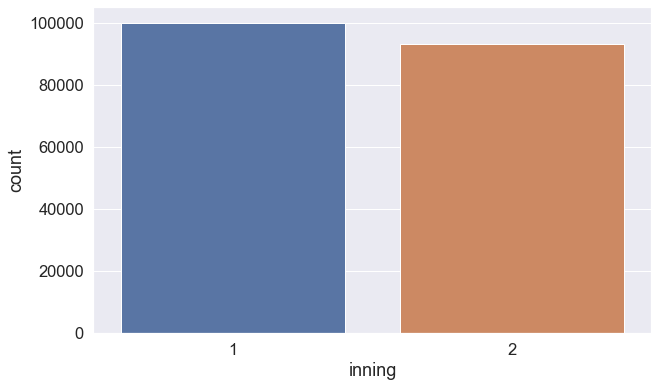

In [31]:
sns.countplot(x = 'inning', data = df)

<AxesSubplot:xlabel='inning', ylabel='count'>

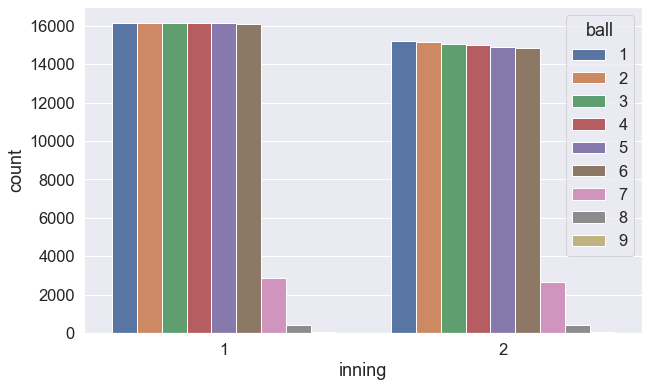

In [32]:
sns.countplot(x = 'inning', data = df,hue='ball')

<AxesSubplot:xlabel='inning', ylabel='count'>

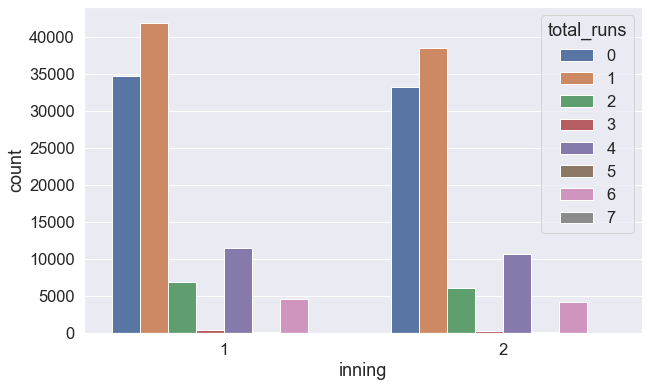

In [33]:
sns.countplot(x = 'inning', data = df,hue='total_runs')

<AxesSubplot:xlabel='ball', ylabel='total_runs'>

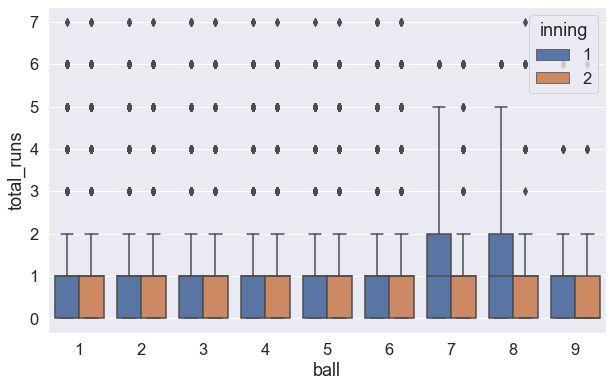

In [34]:
sns.boxplot(x = 'ball', y = 'total_runs', data = df,hue='inning')

In [35]:
cdf=df.corr()
cdf

id    inning      over      ball  batsman_runs  \
id            1.000000  0.000300  0.007874 -0.001956      0.028446   
inning        0.000300  1.000000 -0.046512 -0.003879     -0.007301   
over          0.007874 -0.046512  1.000000 -0.006877      0.086966   
ball         -0.001956 -0.003879 -0.006877  1.000000      0.007168   
batsman_runs  0.028446 -0.007301  0.086966  0.007168      1.000000   
extra_runs   -0.018331 -0.000545 -0.001303 -0.002487     -0.140883   
total_runs    0.024763 -0.007472  0.087345  0.006693      0.977587   
non_boundary  0.000249  0.001463 -0.001185 -0.002156      0.019815   
is_wicket    -0.002822 -0.000998  0.073788  0.004573     -0.170038   

              extra_runs  total_runs  non_boundary  is_wicket  
id             -0.018331    0.024763      0.000249  -0.002822  
inning         -0.000545   -0.007472      0.001463  -0.000998  
over           -0.001303    0.087345     -0.001185   0.073788  
ball           -0.002487    0.006693     -0.002156   0.004573  
batsman_runs   -0.140883    0.977587      0.019815  -0.170038  
extra_runs      1.000000    0.070707     -0.001777  -0.041352  
total_runs      0.070707    1.000000      0.019587  -0.180115  
non_boundary   -0.001777    0.019587      1.000000  -0.002066  
is_wicket      -0.041352   -0.180115     -0.002066   1.000000

<AxesSubplot:>

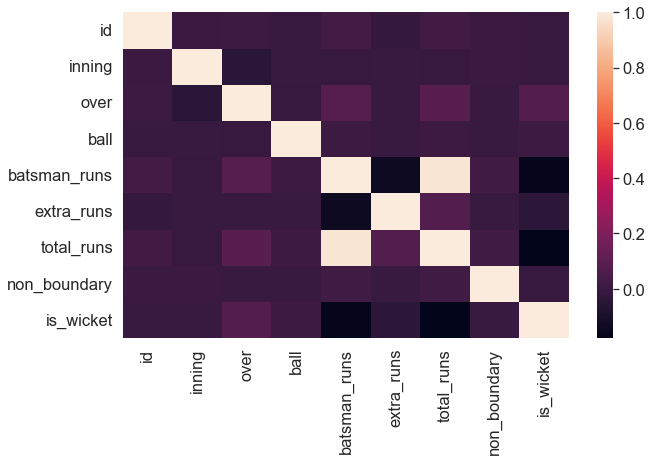

In [36]:
sns.heatmap(cdf)

<AxesSubplot:>

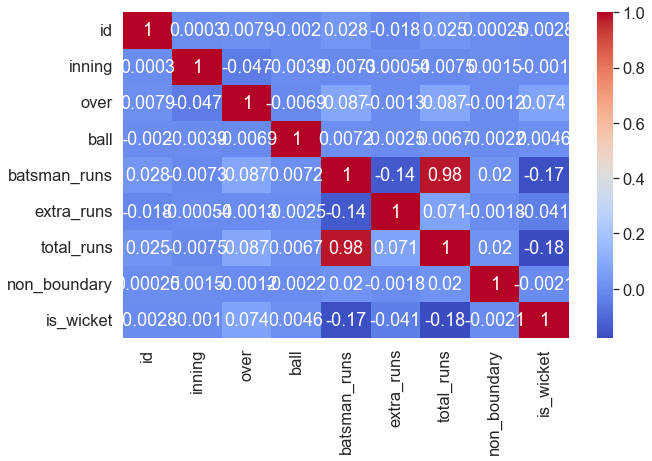

In [37]:
sns.heatmap(cdf, annot = True, cmap = 'coolwarm')

In [38]:
df1 = df.pivot_table(index = 'ball', columns = 'over', values = 'total_runs')

<AxesSubplot:xlabel='over', ylabel='ball'>

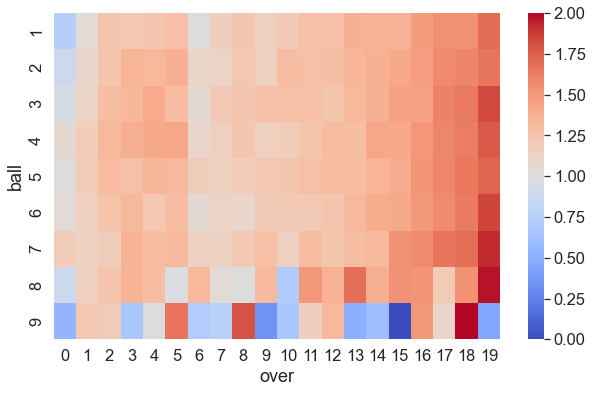

In [39]:
sns.heatmap(df1,cmap = 'coolwarm')

<AxesSubplot:xlabel='total_runs', ylabel='batting_team'>

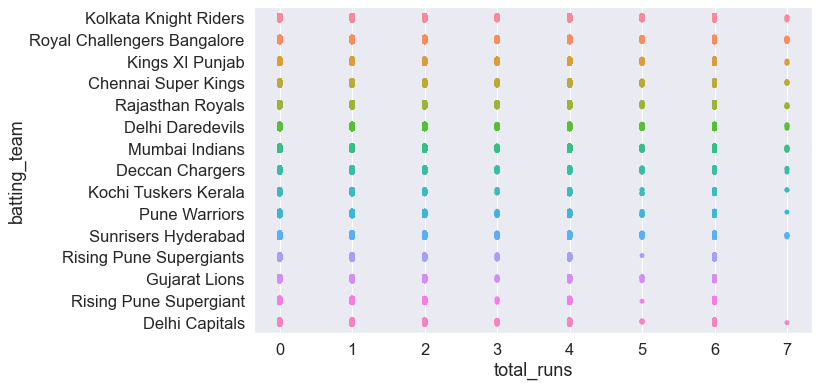

In [40]:
sns.stripplot(x = 'total_runs', y = 'batting_team', data = df)

<AxesSubplot:xlabel='over', ylabel='ball'>

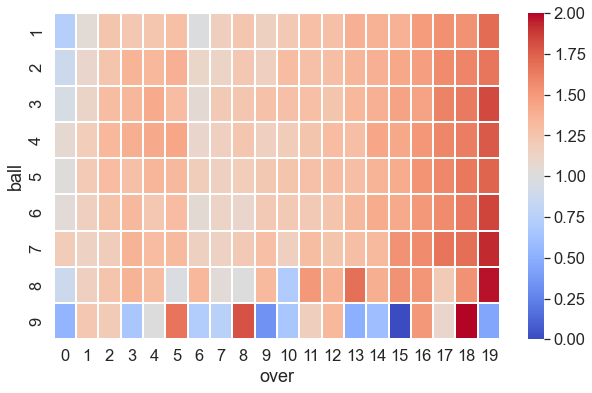

In [41]:
sns.heatmap(df1, cmap = 'coolwarm', linecolor = 'white', linewidth = 2)

In [44]:
bs=df.groupby('batting_team')['total_runs'].sum()
bs

batting_team
Chennai Super Kings            28363
Deccan Chargers                11463
Delhi Capitals                  5296
Delhi Daredevils               24285
Gujarat Lions                   4856
Kings XI Punjab                30017
Kochi Tuskers Kerala            1901
Kolkata Knight Riders          29383
Mumbai Indians                 32286
Pune Warriors                   6358
Rajasthan Royals               24507
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Royal Challengers Bangalore    30214
Sunrisers Hyderabad            19332
Name: total_runs, dtype: int64

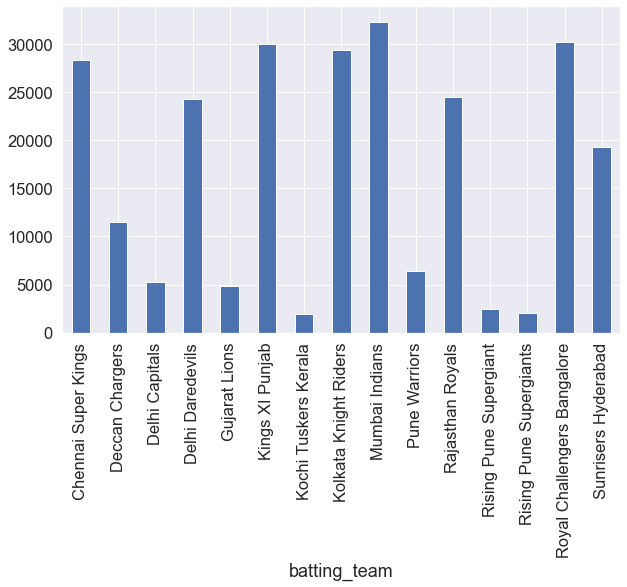

In [45]:
#Matplotlib visualization
df.groupby('batting_team')['total_runs'].sum().plot(kind='bar',x='batting_team',y='total_runs')
plt.show()

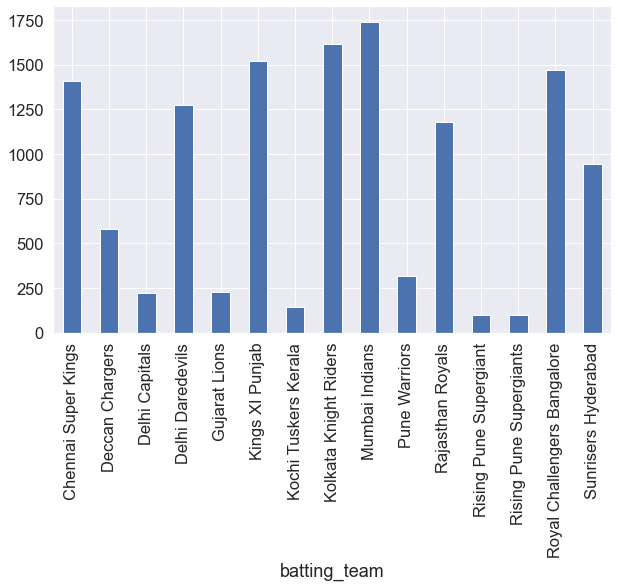

In [46]:
#Matplotlib visualization
df.groupby('batting_team')['extra_runs'].sum().plot(kind='bar',x='batting_team',y='extra_runs')
plt.show()

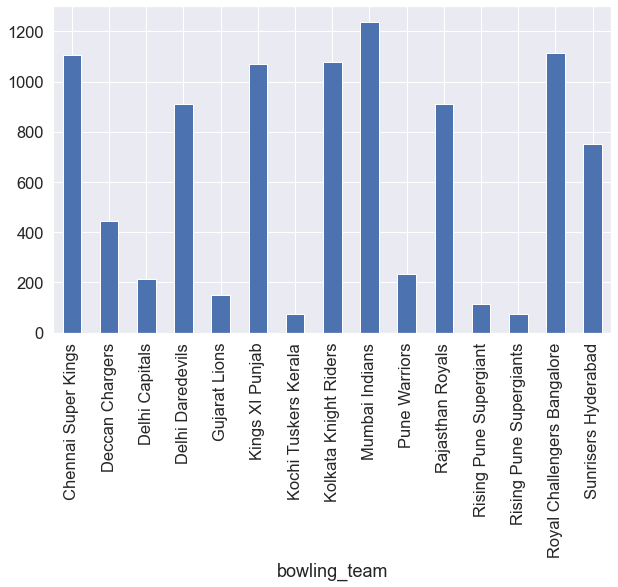

In [50]:
df.groupby('bowling_team')['is_wicket'].sum().plot(kind='bar',x='bowling_team',y='is_wicket')
plt.show()